# Setup

In [ ]:
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: Please use low quality or low res <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

GPU check: 15109 MiB available: this should be fine


# Import and Clipit settings

In [ ]:
import clipit
# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "underwater city"
# You can trade off speed for quality: draft, normal, better, best
quality = "normal"
# Aspect ratio: widescreen, square
aspect = "widescreen"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)

In [ ]:
clipit.add_settings(iterations=350) ## number of iterations to generate image
## Increase number of iterations for better results

In [ ]:
clipit.add_settings(make_video=True) ## we can see how AI generates the image step by step as a video

In [ ]:
clipit.add_settings(size=(800, 200)) ## size of image
#clipit.add_settings(use_pixeldraw=True) ## if you want pixelated drawing 

# UI

In [ ]:
import gradio as gr
import torch
import clipit

# Define the main function
def generate(prompt, quality, style, aspect):
    torch.cuda.empty_cache()
    clipit.reset_settings()
    
    use_pixeldraw = (style == 'pixel art')
    use_clipdraw = (style == 'painting')
    clipit.add_settings(prompts=prompt,
                        aspect=aspect,
                        quality=quality,
                        use_pixeldraw=use_pixeldraw,
                        use_clipdraw=use_clipdraw,
                        make_video=True)
  
    settings = clipit.apply_settings()
    clipit.do_init(settings)
    clipit.do_run(settings)

    return 'output.png', 'output.mp4'

# Create the UI

# Launch the demo
iface = gr.Interface(generate, inputs=["text", "text", "text", "text"], outputs=['image', 'video'], enable_queue=True, live=False)
iface.launch(debug=True)


2.3.7
IMPORTANT: You are using gradio version 2.3.7, however version 2.5.1 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
Running on public URL: https://45814.gradio.app
Interface loading below...


[2022-06-01 18:47:34,333] ERROR in app: Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_

Add different keywords after your description using "#" to get various filtered results. 


1.   deviantart
2.   artstation
3.   flickr
4.   watercolor
5.   child's drawing etc.

A screenshot of each result is attached.

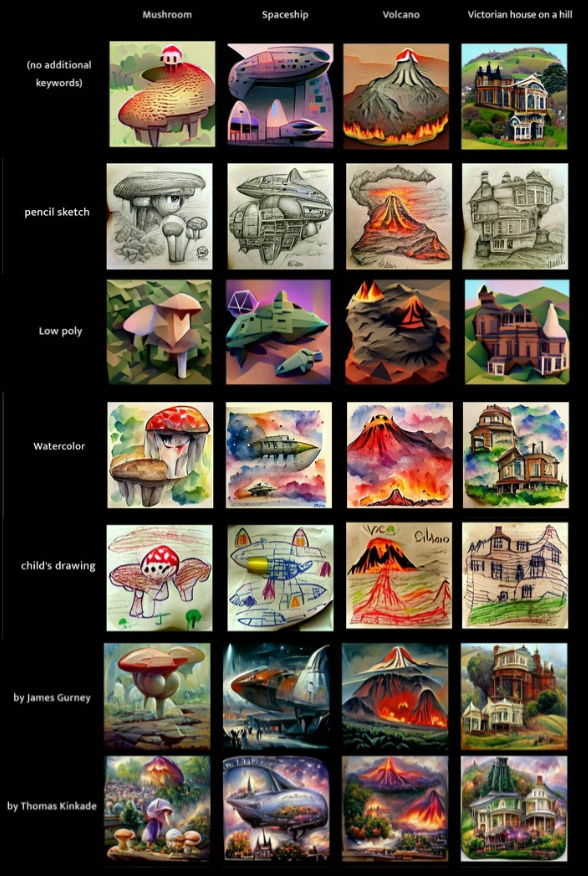

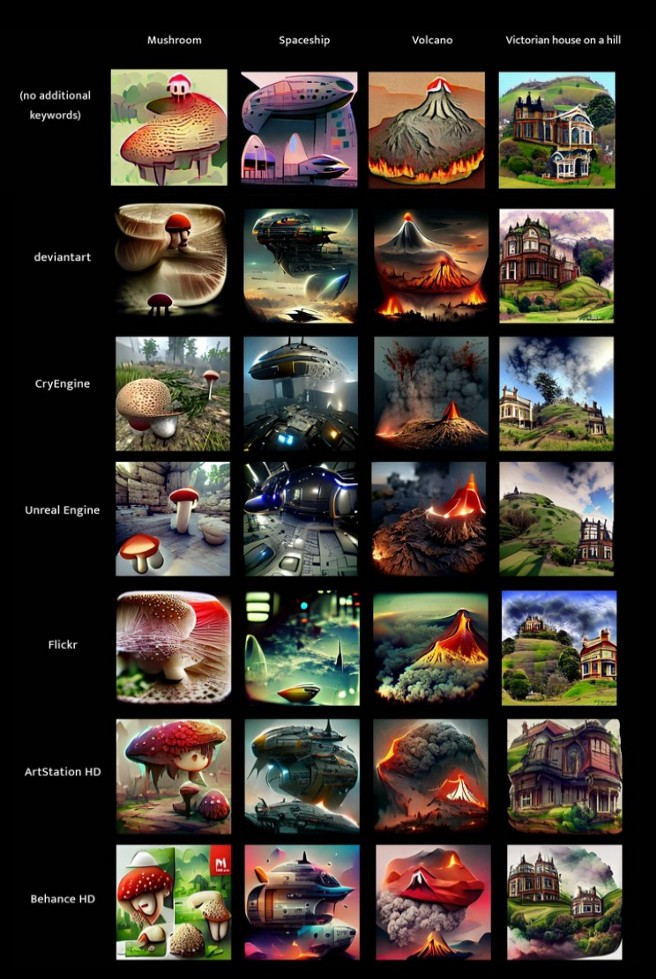




